In [164]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     | 133.1 MB 1.9 MB/s
     |████████████████████████████████| 6.3 MB 4.1 MB/s 
     |████████████████████████████████| 219 kB 44.2 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759595 sha256=8b258b4723b9194bb8bd1aed1706f4e46b882c40864cf4a282a72762a17e7b8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-o17gw5ej/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any

In [165]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.basemap import Basemap

In [62]:
zip_code_database = pd.read_csv('/content/drive/MyDrive/Data mining/zip_code_database.csv')

In [63]:
zip_code_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42724 entries, 0 to 42723
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zip                       42724 non-null  int64  
 1   type                      42724 non-null  object 
 2   decommissioned            42724 non-null  int64  
 3   primary_city              42724 non-null  object 
 4   acceptable_cities         9287 non-null   object 
 5   unacceptable_cities       11666 non-null  object 
 6   state                     42724 non-null  object 
 7   county                    41799 non-null  object 
 8   timezone                  41926 non-null  object 
 9   area_codes                39698 non-null  object 
 10  world_region              333 non-null    object 
 11  country                   42650 non-null  object 
 12  latitude                  42724 non-null  float64
 13  longitude                 42724 non-null  float64
 14  irs_es

In [64]:
zip_code_database.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
0,501,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,"787,939",NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,"787,939",NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,787,NaN,US,18.43,-67.15,0


In [65]:
len(zip_code_database)

42724

In [66]:
zip_code_database.tail()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
42719,99926,PO BOX,0,Metlakatla,NaN,NaN,AK,Prince of Wales-Outer Ketchikan Borough,America/Metlakatla,907,NaN,US,55.14,-131.49,1140
42720,99927,PO BOX,0,Point Baker,NaN,NaN,AK,Prince of Wales-Hyder Census Area,America/Sitka,907,NaN,US,56.30,-133.57,48
42721,99928,PO BOX,0,Ward Cove,NaN,NaN,AK,Ketchikan Gateway Borough,America/Sitka,907,NaN,US,55.45,-131.79,1530
42722,99929,PO BOX,0,Wrangell,NaN,NaN,AK,Wrangell City and Borough,America/Sitka,907,NaN,US,56.41,-131.61,2145
42723,99950,PO BOX,0,Ketchikan,"Edna Bay, Kasaan",NaN,AK,Prince of Wales-Outer Ketchikan Borough,America/Sitka,907,NaN,US,55.34,-131.64,262


In [67]:
len(zip_code_database['state'].unique())

62

In [68]:
zip_code_database['state'].unique()

array(['NY', 'PR', 'VI', 'MA', 'RI', 'NH', 'ME', 'VT', 'CT', 'NJ', 'AE',
       'PA', 'DE', 'DC', 'VA', 'MD', 'WV', 'NC', 'SC', 'GA', 'FL', 'AA',
       'AL', 'TN', 'MS', 'KY', 'OH', 'IN', 'MI', 'IA', 'WI', 'MN', 'SD',
       'ND', 'MT', 'IL', 'MO', 'KS', 'NE', 'LA', 'AR', 'OK', 'TX', 'CO',
       'WY', 'ID', 'UT', 'AZ', 'NM', 'NV', 'CA', 'AP', 'HI', 'AS', 'GU',
       'PW', 'FM', 'MP', 'MH', 'OR', 'WA', 'AK'], dtype=object)

In [69]:
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'VI'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'PR'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'AE'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'AA'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'AP'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'HI'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'AS'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'GU'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'PW'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'FM'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'MP'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'MH'], inplace = True);
 zip_code_database.drop(zip_code_database.index[zip_code_database['state'] == 'AK'], inplace = True);



In [70]:
len(zip_code_database['state'].unique())

49

In [71]:
zip_code_database['state'].unique()

array(['NY', 'MA', 'RI', 'NH', 'ME', 'VT', 'CT', 'NJ', 'PA', 'DE', 'DC',
       'VA', 'MD', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'TN', 'MS', 'KY',
       'OH', 'IN', 'MI', 'IA', 'WI', 'MN', 'SD', 'ND', 'MT', 'IL', 'MO',
       'KS', 'NE', 'LA', 'AR', 'OK', 'TX', 'CO', 'WY', 'ID', 'UT', 'AZ',
       'NM', 'NV', 'CA', 'OR', 'WA'], dtype=object)

In [72]:
len(zip_code_database['zip'].unique())

41307

In [73]:
zip_code_database.columns

Index(['zip', 'type', 'decommissioned', 'primary_city', 'acceptable_cities',
       'unacceptable_cities', 'state', 'county', 'timezone', 'area_codes',
       'world_region', 'country', 'latitude', 'longitude',
       'irs_estimated_population'],
      dtype='object')

In [74]:
zip_code_database.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
0,501,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
194,1001,STANDARD,0,Agawam,NaN,NaN,MA,Hampden County,America/New_York,413,NaN,US,42.06,-72.61,15240
195,1002,STANDARD,0,Amherst,"Cushman, Pelham",South Amherst,MA,Hampshire County,America/New_York,413,NaN,US,42.37,-72.52,16070
196,1003,STANDARD,0,Amherst,NaN,NaN,MA,Hampshire County,America/New_York,413,NaN,US,42.39,-72.52,184


In [75]:
zip_code_database.tail()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
42445,99363,PO BOX,0,Wallula,NaN,NaN,WA,Walla Walla County,America/Los_Angeles,509,NaN,US,46.06,-118.89,200
42446,99371,STANDARD,0,Washtucna,NaN,NaN,WA,Adams County,America/Los_Angeles,509,NaN,US,46.82,-118.32,220
42447,99401,STANDARD,0,Anatone,NaN,NaN,WA,Asotin County,America/Los_Angeles,509,NaN,US,46.08,-117.27,270
42448,99402,STANDARD,0,Asotin,NaN,NaN,WA,Asotin County,America/Los_Angeles,509,NaN,US,46.19,-117.13,1720
42449,99403,STANDARD,0,Clarkston,NaN,NaN,WA,Asotin County,America/Los_Angeles,509,NaN,US,46.36,-117.22,16630


In [76]:
zip_code_database.isnull().sum()

zip                             0
type                            0
decommissioned                  0
primary_city                    0
acceptable_cities           32166
unacceptable_cities         29848
state                           0
county                         67
timezone                       11
area_codes                   2138
world_region                41307
country                         0
latitude                        0
longitude                       0
irs_estimated_population        0
dtype: int64

In [77]:
zip_code = zip_code_database.drop(columns= ['type', 'decommissioned', 'primary_city', 'acceptable_cities',
       'unacceptable_cities', 'state', 'county', 'timezone', 'area_codes',
       'world_region', 'country', 'irs_estimated_population'])

In [78]:
zip_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41307 entries, 0 to 42449
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   zip        41307 non-null  int64  
 1   latitude   41307 non-null  float64
 2   longitude  41307 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.3 MB


In [79]:
zip_code.head()

,zip,latitude,longitude
0,501,40.81,-73.04
1,544,40.81,-73.04
194,1001,42.06,-72.61
195,1002,42.37,-72.52
196,1003,42.39,-72.52


In [80]:
zip_code.reset_index(inplace=True)
zip_code = zip_code.drop(columns= ['index'])


In [81]:
zip_code.head()

,zip,latitude,longitude
0,501,40.81,-73.04
1,544,40.81,-73.04
2,1001,42.06,-72.61
3,1002,42.37,-72.52
4,1003,42.39,-72.52


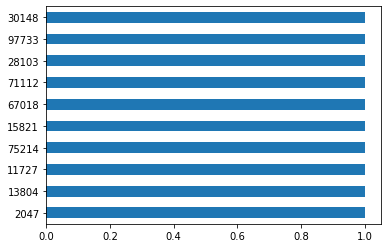

In [82]:
zip_code['zip'].value_counts()[:10].plot(kind='barh')

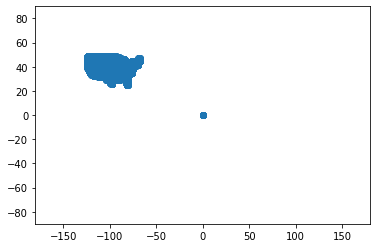

In [83]:
plt.scatter(zip_code['longitude'],zip_code['latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

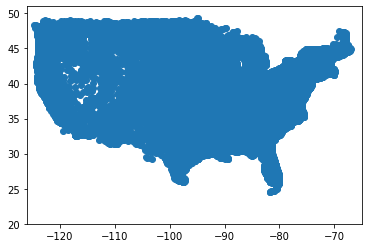

In [84]:
plt.scatter(zip_code['longitude'],zip_code['latitude'])
plt.xlim(-126,-65)
plt.ylim(20,51)
plt.show()

In [85]:
X = zip_code.iloc[:,1:3]

In [86]:
X

,latitude,longitude
0,40.81,-73.04
1,40.81,-73.04
2,42.06,-72.61
3,42.37,-72.52
4,42.39,-72.52
...,...,...
41302,46.06,-118.89
41303,46.82,-118.32
41304,46.08,-117.27
41305,46.19,-117.13


In [87]:
kmeans = KMeans(5000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5000, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([3533, 3533,  632, ..., 1986, 1986, 1986], dtype=int32)

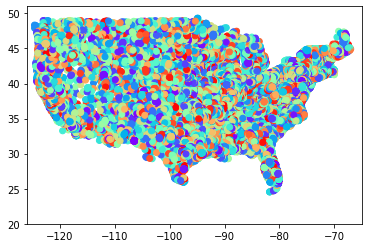

In [89]:
data_with_clusters = zip_code.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-126,-65)
plt.ylim(20,51)
plt.show()

In [90]:
data_with_clusters

,zip,latitude,longitude,Clusters
0,501,40.81,-73.04,3533
1,544,40.81,-73.04,3533
2,1001,42.06,-72.61,632
3,1002,42.37,-72.52,1899
4,1003,42.39,-72.52,1899
...,...,...,...,...
41302,99363,46.06,-118.89,3394
41303,99371,46.82,-118.32,4749
41304,99401,46.08,-117.27,1986
41305,99402,46.19,-117.13,1986


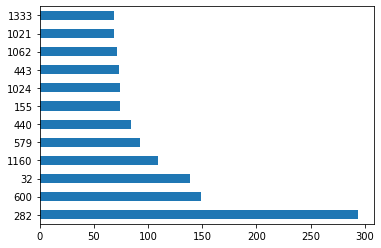

In [91]:
data_with_clusters['Clusters'].value_counts()[:12].plot(kind='barh')

In [ ]:
from sklearn.cluster import DBSCAN # for building a clustering model
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn import metrics # for calculating Silhouette score

import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

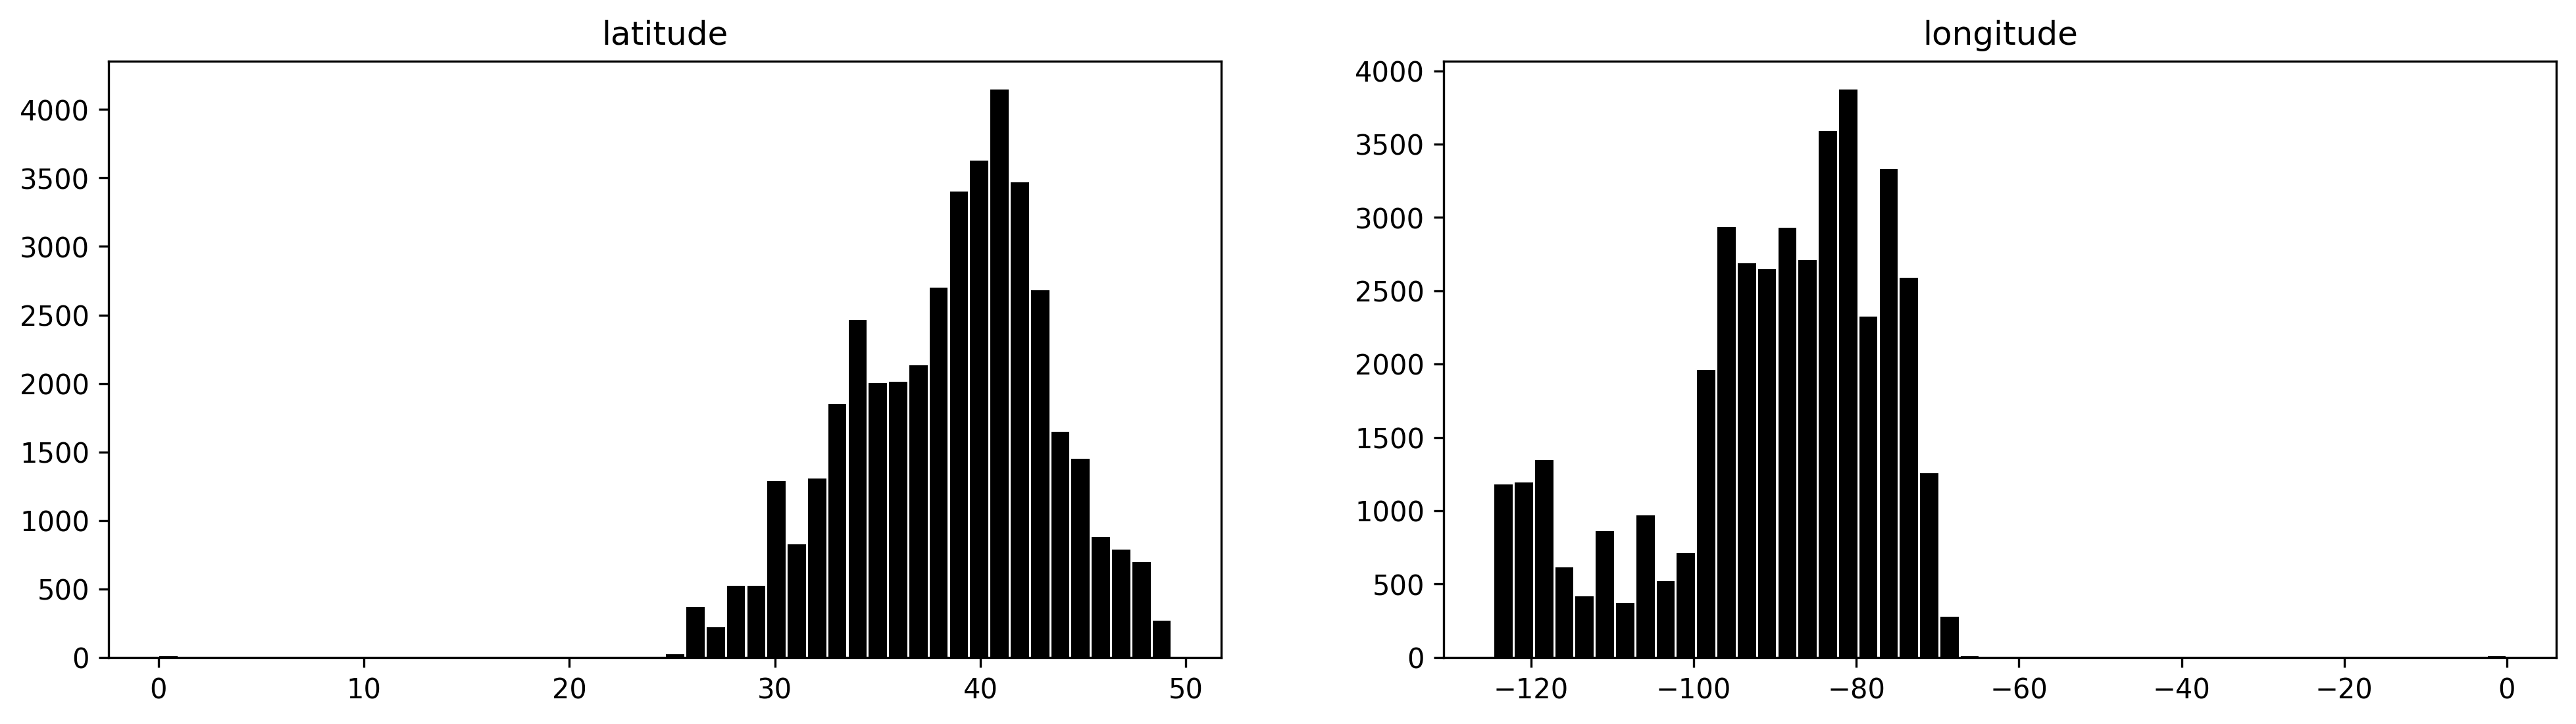

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(16,4), dpi=300)
axs[0].hist(X.iloc[:,0], bins=50, color='black', rwidth=0.9)
axs[0].set_title('latitude')
axs[1].hist(X.iloc[:,1], bins=50, color='black', rwidth=0.9)
axs[1].set_title('longitude')

plt.show()

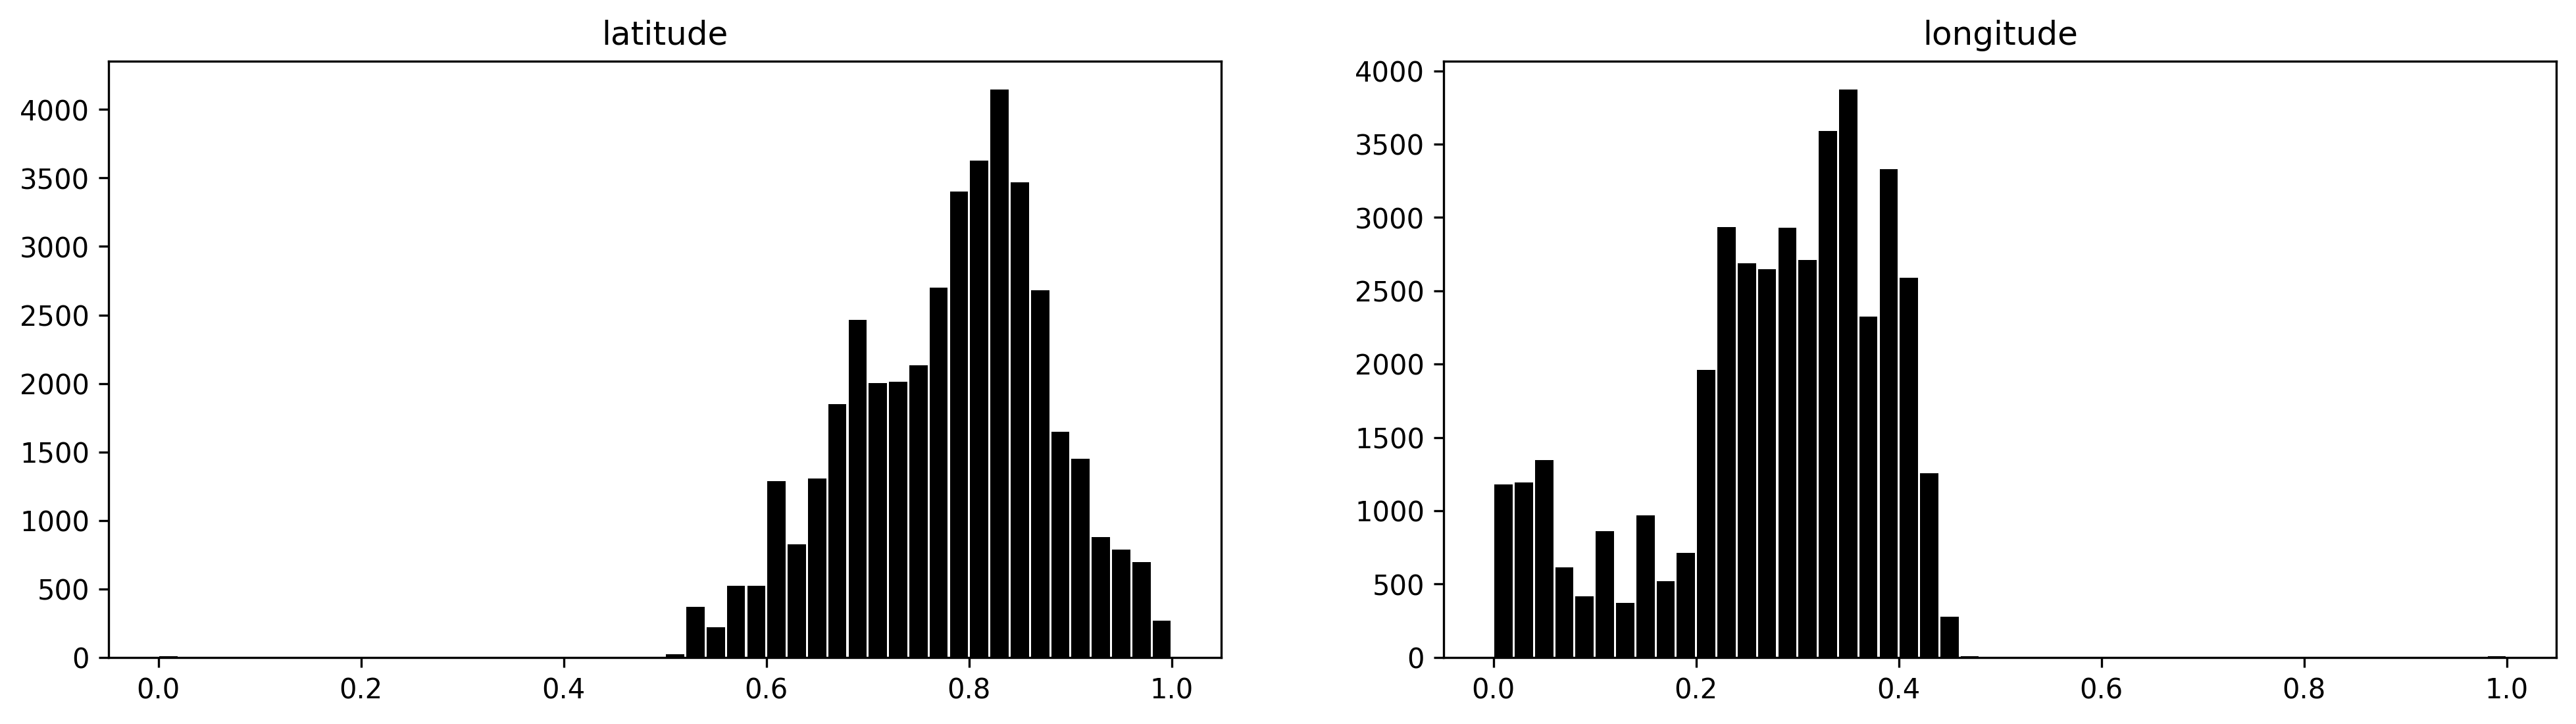

In [93]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Plot distribution charts
fig, axs = plt.subplots(1, 2, figsize=(16,4), dpi=300)
axs[0].hist(X_scaled[:,0], bins=50, color='black', rwidth=0.9)
axs[0].set_title('latitude')
axs[1].hist(X_scaled[:,1], bins=50, color='black', rwidth=0.9)
axs[1].set_title('longitude')

plt.show()

In [ ]:
X_scaled

array([[0.82762117, 0.41394528],
       [0.82762117, 0.41394528],
       [0.852971  , 0.41739549],
       ...,
       [0.93449605, 0.0590548 ],
       [0.93672683, 0.06017813],
       [0.94017441, 0.05945599]])

In [ ]:
data_with_clusters

,zip,latitude,longitude,Clusters
0,501,40.81,-73.04,0
1,544,40.81,-73.04,0
2,1001,42.06,-72.61,0
3,1002,42.37,-72.52,0
4,1003,42.39,-72.52,0
...,...,...,...,...
41302,99363,46.06,-118.89,1
41303,99371,46.82,-118.32,1
41304,99401,46.08,-117.27,1
41305,99402,46.19,-117.13,1


In [ ]:
dbscan=DBSCAN()
dbscan.fit(X[['longitude','latitude']])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

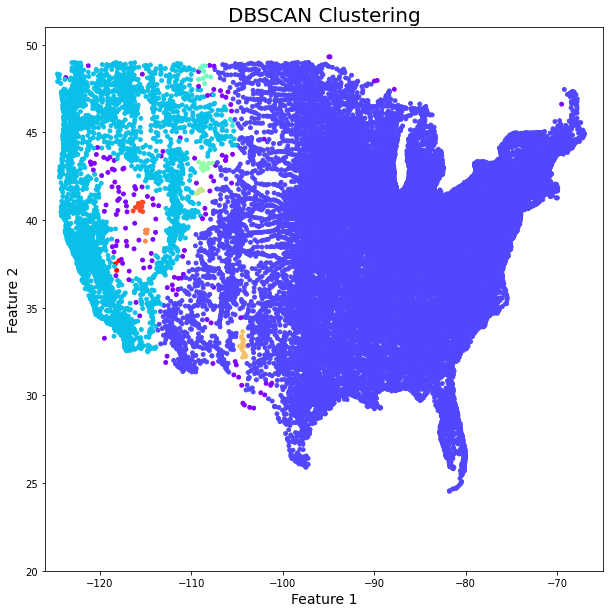

In [ ]:
data_with_clusters['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['DBSCAN_labels'],cmap='rainbow',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.xlim(-126,-65)
plt.ylim(20,51)
plt.show()

In [94]:

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X[['longitude','latitude']])
distances, indices = nbrs.kneighbors(X[['longitude','latitude']])

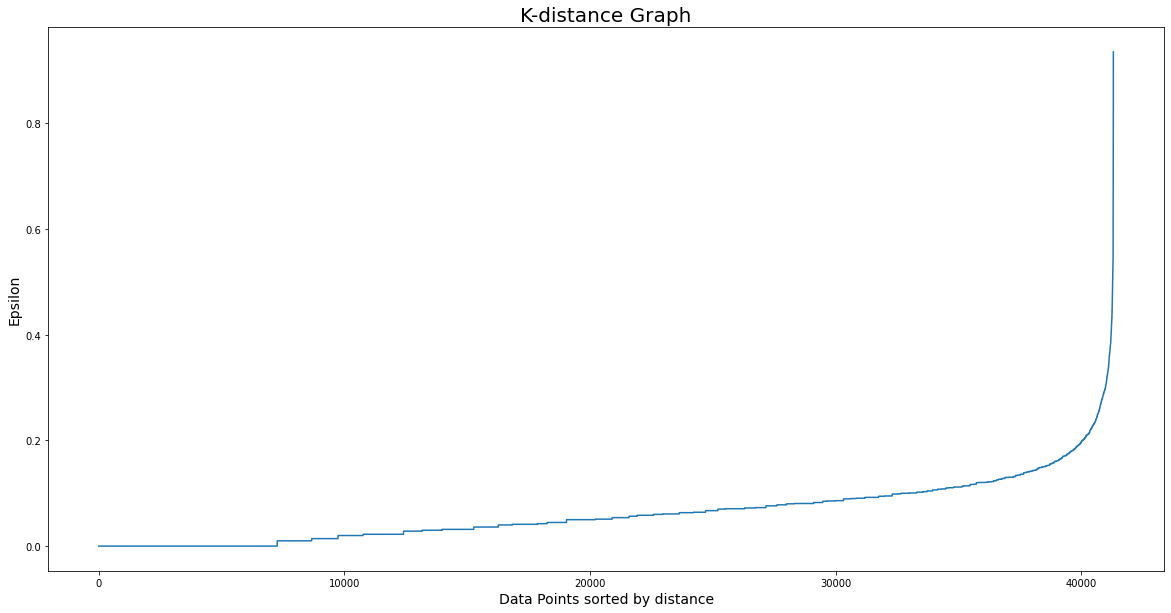

In [95]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [96]:
dbscan_opt=DBSCAN(eps=0.02,min_samples=6)
dbscan_opt.fit(X[['longitude','latitude']])

DBSCAN(algorithm='auto', eps=0.02, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [97]:
data_with_clusters['DBSCAN_opt_labels']=dbscan_opt.labels_
data_with_clusters['DBSCAN_opt_labels'].value_counts()

-1      37009
 45       277
 14       176
 201      116
 192       91
        ...  
 55         6
 5          6
 215        6
 223        6
 47         5
Name: DBSCAN_opt_labels, Length: 249, dtype: int64

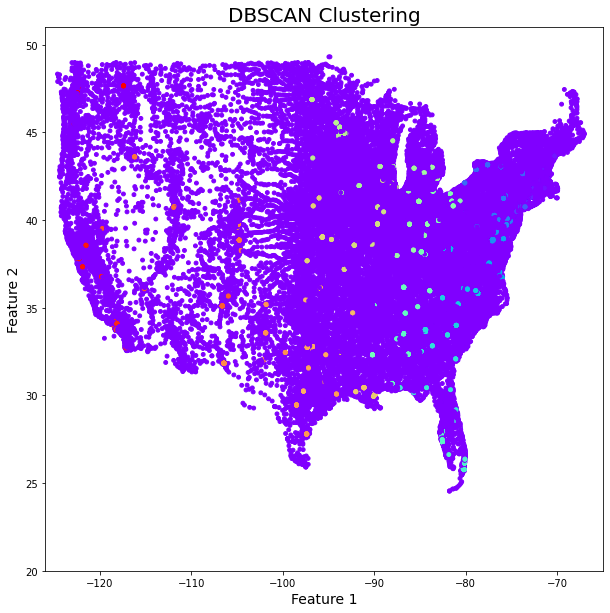

In [98]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['DBSCAN_opt_labels'],cmap='rainbow',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.xlim(-126,-65)
plt.ylim(20,51)
plt.show()

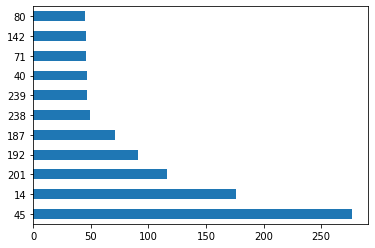

In [100]:
data_with_clusters['DBSCAN_opt_labels'].value_counts()[1:12].plot(kind='barh')

In [103]:
data_with_clusters

,zip,latitude,longitude,Clusters,DBSCAN_opt_labels
0,501,40.81,-73.04,3533,-1
1,544,40.81,-73.04,3533,-1
2,1001,42.06,-72.61,632,-1
3,1002,42.37,-72.52,1899,-1
4,1003,42.39,-72.52,1899,-1
...,...,...,...,...,...
41302,99363,46.06,-118.89,3394,-1
41303,99371,46.82,-118.32,4749,-1
41304,99401,46.08,-117.27,1986,-1
41305,99402,46.19,-117.13,1986,-1


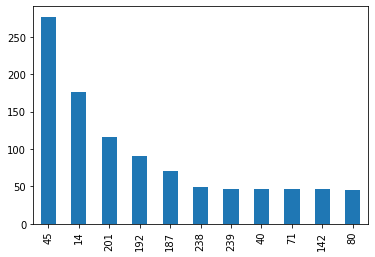

In [154]:
data_with_clusters['DBSCAN_opt_labels'].value_counts()[1:12].plot(kind= 'bar')

In [131]:
top_10 = data_with_clusters.copy()

In [125]:
# top_10.value_counts('DBSCAN_opt_labels').iloc[1:12]

top_10 = top_10.sort_values(by ='DBSCAN_opt_labels' , ascending=False)

top_10

,zip,latitude,longitude,Clusters,DBSCAN_opt_labels
41264,99256,47.66,-117.42,3464,247
41242,99204,47.65,-117.43,3464,247
41248,99210,47.65,-117.42,3464,247
41267,99299,47.65,-117.42,3464,247
41239,99201,47.66,-117.43,3464,247
...,...,...,...,...,...
39745,95641,38.16,-121.59,3235,-1
39746,95642,38.35,-120.77,1508,-1
39747,95644,38.45,-120.52,4144,-1
39767,95667,38.73,-120.80,3670,-1


In [132]:
top_10.value_counts('DBSCAN_opt_labels').iloc[1:12]

DBSCAN_opt_labels
45     277
14     176
201    116
192     91
187     71
238     49
40      47
239     47
142     46
71      46
80      45
dtype: int64

In [158]:
top_10 = top_10.loc[top_10['DBSCAN_opt_labels'].isin([45,14,201,192,187,238,40,239,142,71,80])]

In [159]:
top_10

,zip,latitude,longitude,Clusters,DBSCAN_opt_labels
2335,7020,40.82,-73.97,2153,14
2402,7097,40.71,-74.06,600,14
2437,7302,40.72,-74.05,600,14
2438,7303,40.71,-74.06,600,14
2439,7304,40.71,-74.06,600,14
...,...,...,...,...,...
39832,95814,38.58,-121.49,440,239
39851,95833,38.61,-121.49,440,239
39857,95840,38.58,-121.49,440,239
39868,95867,38.58,-121.49,440,239


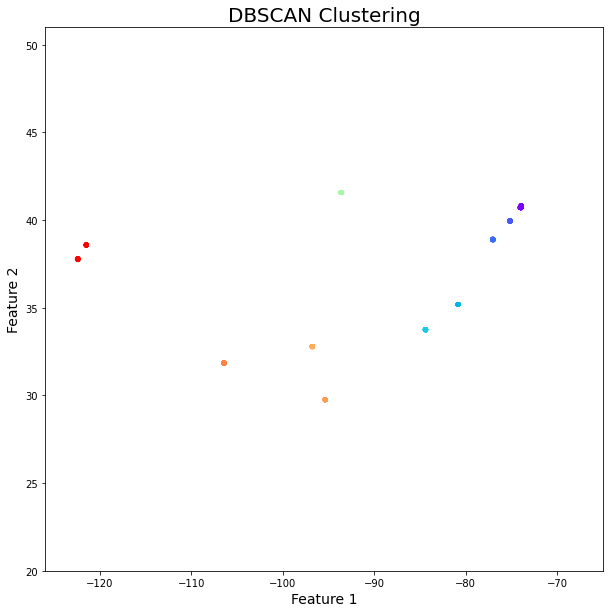

In [160]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(top_10['longitude'],top_10['latitude'],c=top_10['DBSCAN_opt_labels'],cmap='rainbow',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.xlim(-126,-65)
plt.ylim(20,51)
plt.show()

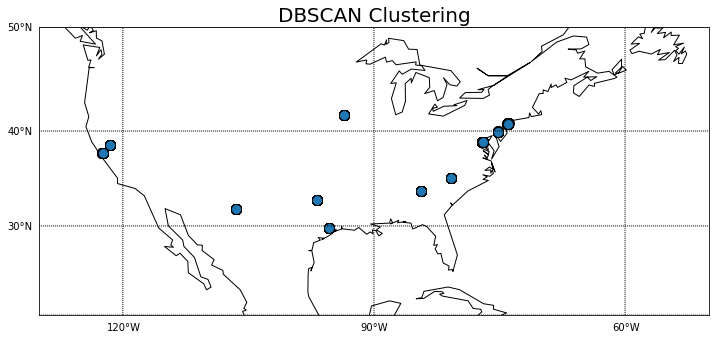

In [181]:

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 20,
           urcrnrlat = 50,
           llcrnrlon = -130,
           urcrnrlon = -50,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])


sites_lat_y = top_10['latitude'].tolist()
sites_lon_x = top_10['longitude'].tolist()

colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=100, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
# m.scatter(top_10['longitude'],top_10['latitude'],c=top_10['DBSCAN_opt_labels'],cmap='rainbow',s=15)
plt.title('DBSCAN Clustering',fontsize=20)

plt.show()